<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 3 Part 1: Linear Systems Theory Applied to Optical Imaging Systems</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Group #: 13  Team Members: Disha Mishra, Millan Patel, Sarah Khan </b></p>

<p style="text-align: left;" ><font size="+1"><b>Objectives</b></p>

<div class="alert alert-block alert-warning">
<font color=black>

- Understand linear system analysis in 1D and 2D, be able to perform convolution, cross correlation, and autocorrelation
- Basic optical imaging system modeling
- Simulate an optical system with a perfect lens 
- Measure the point spread function of your microscope

</font> 
</div>

<p style="text-align: left;" ><font size="+1"><b>Introduction / Basic Rules</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>

We have reviewed linear systems in 1D and extended the analysis to 2D signals. In this lab, you will first perform convolution exercises in Python. <br/>
We will then write a simulator for a perfect optical system and see how the PSF of your microscope affects the final image output. </font>  </div>


# Convolution in Python

<div class="alert alert-block alert-success">
<font color='black'>

1. If you have a signal $f$ that is on $N_f \times M_f$, and a signal $g$ that is $N_g \times M_g$, what is the size of ($f * g$)?
</font> 
</div>

Say that ($f*g$) = C </br>
We are now trying to find the size of C. We know that for a discrete convolution, our equation for each value in the matrix C is: </br>
C(i,j) = $\sum_{n=0}^{N_f - 1}$ $\sum_{m=0}^{M_f - 1} f(n,m)g(i-n, j-m)$ </br>
In this case, i and j are the dummy variables, but also the matrix spaces that are to be filled for C. Based on the convolution, this means that $0<i<N_f+N_g - 1$ and that $0<j<M_f+M_g - 1$ 
</br>
#### Thus, ($f*g$) = C has a size of $N_f+N_g - 1 \times M_f+M_g - 1$ 

<div class="alert alert-block alert-warning">
<font color='black'>
Convolution in Python can be performed using `convolve` in 1D and `convolve2d` in 2D. To do this, first import the following functions:

`import scipy` <br/>
`from scipy.signal import convolve2d` <br/>
    
    
By default, `convolve2d` returns the full size of the convolution results. <br/> For many applications, we want to keep the size of the output the same as one of the signals. The following would give an output that is the same size as $f$: <br/>

`convolve2d(f, g, 'same')`<br/>

Now let’s perform some convolutions and try to interpret the results.<br/>
Load the image we provided, `SanFrancisco.npy`, into Python. <br/>
Show the image below. Assume each pixel is 1mm by 1mm. 

</font> 
</div>

In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
from scipy.signal import convolve2d
from numpy.fft import fft2, fftshift, ifftshift, ifft2

<div class="alert alert-block alert-success">
<font color='black'>

2. Now let’s perform some convolutions and try to interpret the results.<br/>
Load the image we provided, `SanFrancisco.npy`, into Python. <br/>
Show the image below. Assume each pixel is 1mm by 1mm. 

</font> 
</div>

Text(0, 0.5, 'y values (mm)')

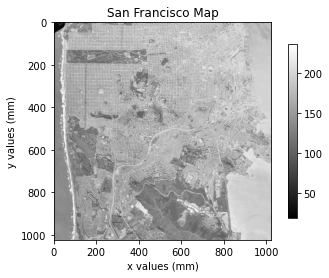

In [17]:
sf = np.load("Lab3/SanFrancisco.npy"); # load San Francisco Image
# print image 
x = plt.imshow(sf, cmap = "gray");
plt.colorbar(x, shrink = 0.8);
plt.title("San Francisco Map");
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)")

<div class="alert alert-block alert-success">
<font color='black'>

3. Download `functions.py` from Lab 3 course content on Blackboard and put it in your working directory. Make a 2D Gaussian kernel using the code below: <br/>

`from functions import gauss2d` <br/>
`h = gauss2d((52, 52), 3)`

Assume the same pixel spacing (1 mm) as above. Paste the result below:
</font> 
</div>

(52, 52)

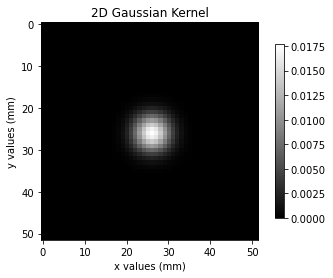

In [14]:
from functions import gauss2d
h = gauss2d((52,52), 3) # create 2D kernel
# print image
x = plt.imshow(h, cmap = "gray");
plt.colorbar(x, shrink = 0.8);
plt.title("2D Gaussian Kernel");
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)")

<div class="alert alert-block alert-success">
<font color='black'>

4. If the image is the input to an arbitrary system and `h` is the impulse response of the system, what is the output of the system? <br/> Keep the size of the output the same as the image. Paste your results below. Explain what you see in both the spatial domain and in the frequency domain (i.e., what is the transfer function of the system and how is it affecting the output?)
    
</font> 
</div>

Text(0, 0.5, 'y frequency (1/mm)')

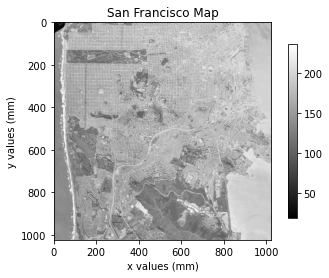

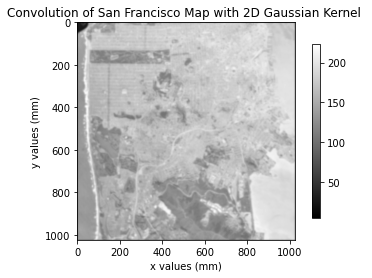

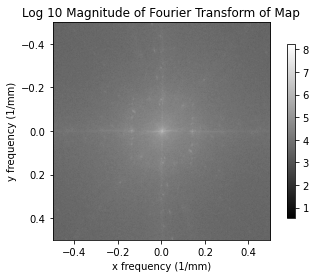

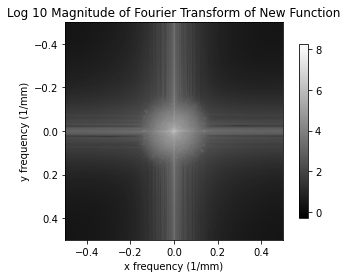

In [36]:
from numpy.fft import fft2, fftshift, ifftshift
# original image
x = plt.imshow(sf, cmap = "gray");
plt.colorbar(x, shrink = 0.8);
plt.title("San Francisco Map");
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)")

cID = convolve2d(sf,h,'same') # convolution in the image domain
# Print image
plt.figure()
x = plt.imshow(cID, cmap = "gray");
plt.colorbar(x, shrink = 0.8);
plt.title("Convolution of San Francisco Map with 2D Gaussian Kernel ");
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)")

# fourier domain
# find sampling frequency 
N = 1024; # size of both images are 201x201
a = 1 # sampling period is every pixel (1 mm)
fs = (1 / (N*a)) * N

# Fourier Transform of convolution
Fft1 = fftshift(fft2(ifftshift(cID)))
FftOrig = fftshift(fft2(ifftshift(sf)))
                    

#Log 10 Fourier Transformation of Map
plt.figure()
real_F_plot = plt.imshow(np.log10(np.abs(FftOrig)), cmap = "gray", extent = [(-fs/2),(fs/2)*((N-2)/N),(fs/2),(-fs/2)*((N-2)/N)])
plt.colorbar(real_F_plot, shrink=0.8)
plt.title("Log 10 Magnitude of Fourier Transform of Map")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)") 

#Log 10 Fourier Transformation of Convolved Map
plt.figure()
real_F_plot = plt.imshow(np.log10(np.abs(Fft1)), cmap = "gray", extent = [(-fs/2),(fs/2)*((N-2)/N),(fs/2),(-fs/2)*((N-2)/N)])
plt.colorbar(real_F_plot, shrink=0.8)
plt.title("Log 10 Magnitude of Fourier Transform of New Function")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")



As we can see in the spatial domain, the convolved image is essentially smoother than the original image. The original image contains more lines and details in the image whereas the convolved image has smoothed out the very small details, bringing about a blurring effect on the image. This blurring image allows noise to be reduced, and also reduces detail in the image. 
</br> 
</br>
The fourier transform of the convolved image is quite different from the fourier transform of the original image. The reason for this can be seen by analyzing how the Fourier Transfromation of the convolution is computed. The fourier transform of the convolution is Y(f) = X(f)H(f) where X(f) is the fourier transform of the map image and H(f) is the transfer function. The impulse response of the convolved image is h, which is a gaussian kernel. The transfer function is the fourier transform of the impulse response, which is simply another gaussian function. 
</br> 
</br>
Thus, in the fourier transform, the image we see is essentially obtained by multiplying the fourier transformation of the original map (as seen above) with a very similar gaussian kernel as shown in the previous question. By doing this, we are reducing the amount of high frequency values in the image, which can be seen in the frequency domain through the colorbar which shows lower high frequency values in the fourier transform of the convolved image. This decrease in frequency values after a convolution with a gaussian transfer function means that a gaussian function is a low pass filter as it is attentuating certain frequencies. 

<div class="alert alert-block alert-success">
<font color='black'>

5. Now try to perform the same convolution in the Fourier domain using the convolution theorem and see if you get the same results back. <br/> Note that you would need to zero pad `h` to the same size as the image. You can achieve this with the `np.pad` function in Python. <br/> Paste your code and your image output below. Is the output (exactly) the same as what you got previously using convolution? Please explain what you see. 
    
</font> 
</div>

<ipython-input-46-fe157e6eee26>:8: RuntimeWarning: divide by zero encountered in log10
  real_F_plot = plt.imshow(np.log10(np.abs(Yf)), cmap = "gray", extent = [(-fs/2),(fs/2)*((N-2)/N),(fs/2),(-fs/2)*((N-2)/N)])


Text(0, 0.5, 'y frequency (1/mm)')

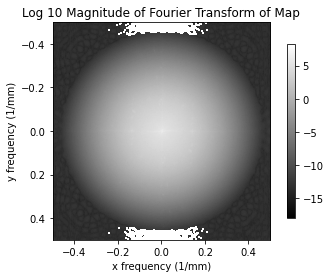

In [46]:
h1 = h # duplicate 2D kernel
h1 = np.pad(h,(486,486), 'constant', constant_values=0)
Xf= fftshift(fft2(ifftshift(sf))) #fourier transform of the map image 
Hf = fftshift(fft2(ifftshift(h1))) # fourier transform of the impulse response h1
Yf = Xf*Hf

plt.figure()
real_F_plot = plt.imshow(np.log10(np.abs(Yf)), cmap = "gray", extent = [(-fs/2),(fs/2)*((N-2)/N),(fs/2),(-fs/2)*((N-2)/N)])
plt.colorbar(real_F_plot, shrink=0.8)
plt.title("Log 10 Magnitude of Fourier Transform of Map")
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)") 



<div class="alert alert-block alert-success">
<font color='black'> 
6. Make the following two filters/kernels in Python: <br/>
Perform convolution of each filter with the image. Paste your image below. Explain what you see using both spatial domain and frequency domain descriptions. 
</font> 
</div>

<img src="Lab3/kernel.png" style="width:400px">

# Pupil function and PSF Simulation

<div class="alert alert-block alert-warning">
<font color='black'> In this part of the lab, you will simulate a few pupil functions and compute the corresponding Point Spread Function (PSF) and Optical Transfer Function (OTF). </font> 
</div>

<div class="alert alert-block alert-success">
<font color='black'>

1. Let’s first simulate a circular pupil function [`P(x,y)` in the notes]. <br/> On a 1001 by 1001 grid with a 0.1 mm sampling interval, simulate a centered circular pupil function with 12mm diameter. Paste your result below with axis labels and colorbar.

</font> 
</div>

<div class="alert alert-block alert-success">
<font color='black'>

2. Compute the PSF of the pupil function. We can presume the axes of the pupil function are already scaled to the right imaging plane in this lab, i.e., you can compute the Fourier transform or autocorrelation of the pupil function directly. Paste your code below. Please also include 1) a surface plot of the PSF, 2) a surface plot of the log10 transformed PSF. For both figures, please zoom in on the central 201 by 201 pixels and include axis labels and colorbar. <br/>

You can produce a surface plot using the `plot_surface` function in `matplotlib`. Take a look at the example at https://matplotlib.org/stable/gallery/mplot3d/surface3d.html. This function plots `Z` which is a function of 2D coordinate matrices `X` and `Y` produced from `np.meshgrid`. Note that you need to provide the keyword argument `subplot_kw={"projection": "3d"}` in order to use `plot_surface`. <br/>
</font> 
</div>

<div class="alert alert-block alert-warning">
<font color='black'> 

From the PSF, we can compute the Fourier domain transfer function of the system. This function is called the Optical Transfer Function (OTF), and is equal to the Fourier transform of the PSF normalized by the totally area under the OTF, or equivalently, the DC value (`frequency = [0, 0]`) of the Fourier transform. 
</font> 
</div>

<div class="alert alert-block alert-success">
<font color='black'>

3. Compute the OTF. Past your code below and include both a regular plot (`imshow`) and a surface plot (`plot_surface`) of the OTF below. 
</font> 
</div>

<div class="alert alert-block alert-success">
<font color='black'> 

4. Now let’s simulate what an image passing through a system with this pupil function looks like. Make a star pattern by calling the `make_star` function provided in lab 3 course content. You need to provide the axes of your image to the function. Presuming you called your axes variables `x` and `y` (Note: both are 1D arrays instead of 2D from meshgrid), you can make a star pattern with:
    
`from functions import make_star` <br/>
`star = make_star(x, y)`
    
Use the same axes as above (1001 by 1001 grid with a 0.1 mm sampling interval), plot what the star pattern would look like through a system with the PSF and OTF you just calculated. Paste your code and your results below. Explain what you observe.
</font> 
</div>

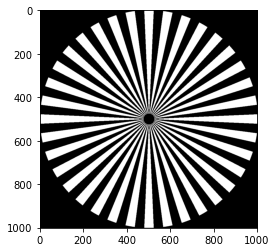

In [3]:
from functions import make_star
star = make_star(xr,yr)
plt.imshow(star, cmap='gray')

<div class="alert alert-block alert-success">
<font color='black'>

5. Now let’s the make the aperture smaller. Make a 3mm diameter pupil function. Compute the PSF, OTF, and image output and paste the images below. <br/> What do you see? How does this relate to the observation from the last lab?</font> 
</div>

Text(0.5, 1.0, 'Image Output')

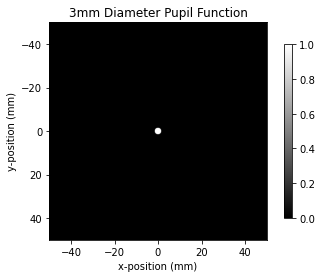

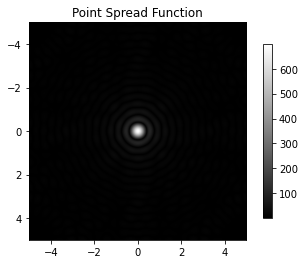

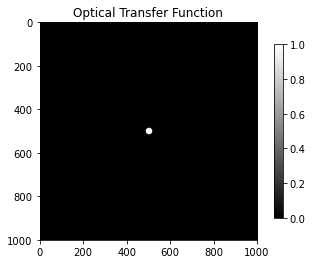

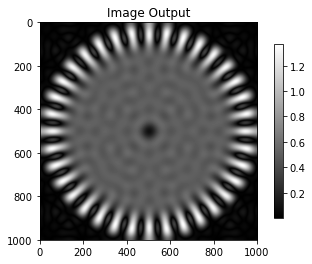

In [4]:
# Pupil Function
xr = np.linspace(-50,50,1001)
yr = np.linspace(-50,50,1001)
fs = 1001/100
[X,Y] = np.meshgrid(xr,yr)
P = np.sqrt(X**2 + Y**2) < 3/2
x=plt.imshow(P, cmap='gray', extent=[-50,50,50,-50])
plt.colorbar(x,shrink=0.8)
plt.xlabel("x-position (mm)")
plt.ylabel("y-position (mm)")
plt.title("3mm Diameter Pupil Function")
# Point Spread Function
plt.figure()
PSF = fftshift(fft2(ifftshift(P)))
x=plt.imshow(np.abs(PSF), cmap='gray', extent=[-fs/2,fs/2,fs/2,-fs/2])
plt.colorbar(x,shrink=0.8)
plt.title("Point Spread Function")
# Optical Transfer Function
plt.figure()
OTF = fftshift(fft2(ifftshift(PSF)))
OTF = OTF / OTF[500,500]
x=plt.imshow(np.abs(OTF), cmap='gray')
plt.colorbar(x,shrink=0.8)
plt.title("Optical Transfer Function")
# Image Output
plt.figure()
FT_star = fftshift(fft2(ifftshift(star)))
FT_output = FT_star * OTF
img_out = ifftshift(ifft2(fftshift(FT_output)))
x=plt.imshow(np.abs(img_out), cmap='gray')
plt.colorbar(x,shrink=0.8)
plt.title("Image Output")
# plt.figure()
# plt.imshow(convolve2d(PSF,star,'same',boundary='wrap'))

<div class="alert alert-block alert-warning">
<font color='black'> 

Of course not all optical systems have circular pupil functions. Now let’s simulate a few other pupil functions and see how they affect the image output. <br/> Construct a pupil function with an annulus and cross shaped obstruction:
</font> 
</div>

<img src="Lab3\Pupil_cross.png" style="width:400px">

<div class="alert alert-block alert-success">
<font color='black'> 

6. You can construct this in Python by making a disc of 12 mm diameter, subtract a disc of 8 mm diameter, and subtract a central vertical band and a central horizontal band of width 4 mm. <br/>
The Matlab logical operations are going to be helpful for this step:

- and: `np.logical_and(A, B)`
- or: `np.logical_or(A, B)`
- not: `np.logical_not(A)`
    
Paste your code and your pupil function below. 
</font> 
</div>

Text(0.5, 1.0, 'Pupil Function')

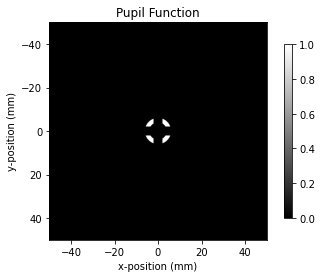

In [37]:
P = np.logical_and(np.sqrt(X**2 + Y**2) < 6, np.sqrt(X**2 + Y**2) > 4)
A = np.logical_or(X > 2, X < -2)
B = np.logical_or(Y > 2, Y < -2)
P = np.logical_and(P,A)
P = np.logical_and(P,B)
x=plt.imshow(P, cmap='gray', extent=[-50,50,50,-50])
plt.colorbar(x, shrink=0.8)
plt.xlabel("x-position (mm)")
plt.ylabel("y-position (mm)")
plt.title("Pupil Function")

<div class="alert alert-block alert-success">
<font color='black'>

7. Compute the PSF, OTF, and final image output of the star pattern. Paste all images below. Interpret the image output. </font> 
</div>

Text(0.5, 1.0, 'Image Output')

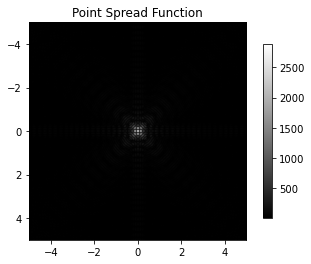

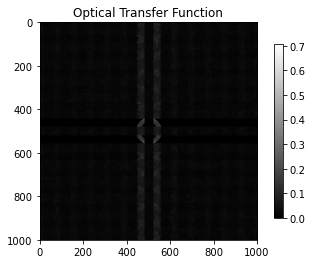

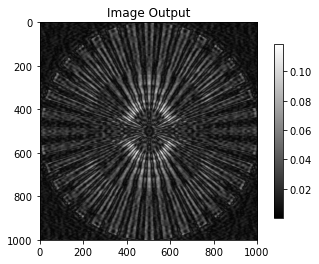

In [32]:
from sklearn import preprocessing
# Point Spread Function
plt.figure()
PSF = fftshift(fft2(ifftshift(P)))
x=plt.imshow(np.abs(PSF), cmap='gray', extent=[-fs/2,fs/2,fs/2,-fs/2])
plt.colorbar(x,shrink=0.8)
plt.title("Point Spread Function")
# Optical Transfer Function
plt.figure()
OTF = fftshift(fft2(ifftshift(PSF)))
# OTF = OTF / OTF[500,500]
OTF = preprocessing.normalize(np.abs(OTF))
x=plt.imshow(OTF, cmap='gray')
plt.colorbar(x,shrink=0.8)
plt.title("Optical Transfer Function")
# Image Output
plt.figure()
FT_star = fftshift(fft2(ifftshift(star)))
FT_output = FT_star * OTF
img_out = ifftshift(ifft2(fftshift(FT_output)))
x=plt.imshow(np.abs(img_out), cmap='gray')
plt.colorbar(x,shrink=0.8)
plt.title("Image Output")

<div class="alert alert-block alert-success">
<font color='black'>

8. Make the following pupil function in Python. There are two circular apertures of 6mm diameter, each diagonally offset from the origin by 3 mm in the x and y direction.  <br/> Paste your code and your pupil function below. </font> 
</div>

<img src="Lab3\Pupil_6mm.png" style="width:400px">

Text(0.5, 1.0, 'Pupil Function')

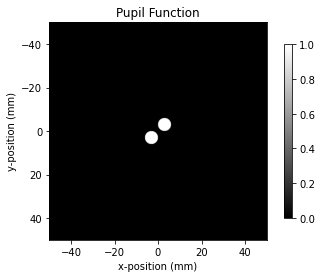

In [38]:
P = np.logical_or(np.sqrt((X+3)**2 + (Y-3)**2) < 3, np.sqrt((X-3)**2 + (Y+3)**2) < 3)
x=plt.imshow(P, cmap='gray', extent=[-50,50,50,-50])
plt.colorbar(x, shrink=0.8)
plt.xlabel("x-position (mm)")
plt.ylabel("y-position (mm)")
plt.title("Pupil Function")

<div class="alert alert-block alert-success">
<font color='black'>

9. Compute the PSF, OTF, and final image output of the star pattern. Paste all images below. Interpret the image output.  </font> 
</div>

Text(0.5, 1.0, 'Image Output')

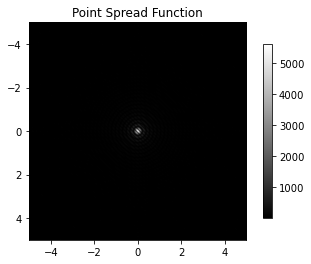

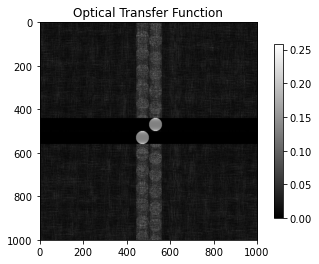

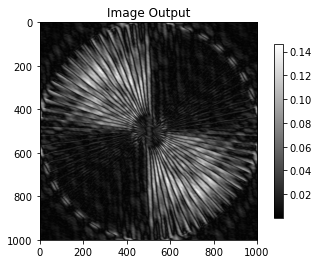

In [35]:
# Point Spread Function
plt.figure()
PSF = fftshift(fft2(ifftshift(P)))
x=plt.imshow(np.abs(PSF), cmap='gray', extent=[-fs/2,fs/2,fs/2,-fs/2])
plt.colorbar(x,shrink=0.8)
plt.title("Point Spread Function")
# Optical Transfer Function
plt.figure()
OTF = fftshift(fft2(ifftshift(PSF)))
# OTF = OTF / OTF[500,500]
OTF = preprocessing.normalize(np.abs(OTF))
x=plt.imshow(OTF, cmap='gray')
plt.colorbar(x,shrink=0.8)
plt.title("Optical Transfer Function")
# Image Output
plt.figure()
FT_star = fftshift(fft2(ifftshift(star)))
FT_output = FT_star * OTF
img_out = ifftshift(ifft2(fftshift(FT_output)))
x=plt.imshow(np.abs(img_out), cmap='gray')
plt.colorbar(x,shrink=0.8)
plt.title("Image Output")